In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pylab as plt

In [3]:
from image_analysis.read_files import *
from image_analysis.fit import plot
from image_analysis.fit import regionprops, statistics
from image_analysis.preprocess import mask

In [4]:
# makes plotting very slow, should be commented while testing
plt.rcParams['text.usetex'] = True 

In [5]:
df = pd.read_excel("system_size_L_and_gaps_x0/system_size_L_and_gaps_x0.xlsx")

In [6]:
df.loc[df['animal_size'] == 1.5, 'time'] = 0

In [7]:
df

,pretreated_file_name,hcr,animal_size,time,shh_segm,fgf_segm,dusp_segm,system_size_L_along_SF_pc40_um,length_L_SF_pc40_um,x0_pc40_um_shh,...,x0_pc60_um_shh,x0_pc60_um_fgf,system_size_L_along_SF_pc70_um,length_L_SF_pc70_um,x0_pc70_um_shh,x0_pc70_um_fgf,system_size_L_along_SF_pc80_um,length_L_SF_pc80_um,x0_pc80_um_shh,x0_pc80_um_fgf
0,hcr11_lb27_fl,11,1.5,0,yes,yes,yes,288,172,42,...,40,68,290,184,44,60,276,178,38,58
1,hcr11_lb28_fl,11,1.5,0,yes,yes,yes,298,162,52,...,54,90,308,160,56,90,298,162,50,84
2,hcr11_lb28_fr,11,1.5,0,yes,yes,yes,264,52,112,...,30,48,174,92,32,48,180,92,34,52
3,hcr15_lb41_fl,15,1.5,0,yes,yes,yes,314,154,36,...,28,104,266,154,34,76,254,176,30,46
4,hcr16_lb44_fl,16,1.5,0,yes,yes,yes,238,114,50,...,52,72,270,144,54,70,266,148,50,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,hcr17_7cm_9dpa_dapi,17,7.0,9,yes,yes,yes,1148,620,192,...,206,276,1144,652,208,282,1126,652,202,270
59,hcr21_7cm_10dpa_noif_17,21,7.0,10,yes,yes,yes,1306,646,274,...,270,444,1526,696,292,536,1542,712,278,550
60,hcr21_7cm_10dpa_noif_16,21,7.0,10,yes,yes,no,1176,596,234,...,232,402,1148,570,230,346,1178,576,232,368
61,hcr22_7cm_10d_t3a,22,7.0,10,yes,yes,yes,1216,716,200,...,312,416,1318,574,336,406,1306,584,318,402


# Plot

In [8]:
from matplotlib_defaults import *

In [9]:
colormap = plt.colormaps['Dark2']
colors = colormap(np.linspace(0, 1, 10))
sizes = [1.5, 2.5, 5, 7]
size_to_color = {
    1.5: colors[1], 
    2.5: colors[2],
    5.0: colors[3],
    7.0: colors[4]
}

df['color'] = df['animal_size'].map(size_to_color)

# Define the marker mapping
default_marker = 'o'  # Circle marker
# Star marker for hcr = 23, another method for dusp staning
df['marker'] = df['hcr'].apply(lambda x: '*' if x == 23 else default_marker)

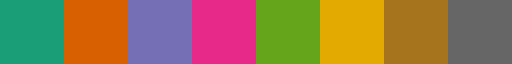

In [10]:
colormap

In [11]:
df = df.dropna(subset=['time'])

In [12]:
df.head()

,pretreated_file_name,hcr,animal_size,time,shh_segm,fgf_segm,dusp_segm,system_size_L_along_SF_pc40_um,length_L_SF_pc40_um,x0_pc40_um_shh,...,system_size_L_along_SF_pc70_um,length_L_SF_pc70_um,x0_pc70_um_shh,x0_pc70_um_fgf,system_size_L_along_SF_pc80_um,length_L_SF_pc80_um,x0_pc80_um_shh,x0_pc80_um_fgf,color,marker
0,hcr11_lb27_fl,11,1.5,0,yes,yes,yes,288,172,42,...,290,184,44,60,276,178,38,58,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
1,hcr11_lb28_fl,11,1.5,0,yes,yes,yes,298,162,52,...,308,160,56,90,298,162,50,84,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
2,hcr11_lb28_fr,11,1.5,0,yes,yes,yes,264,52,112,...,174,92,32,48,180,92,34,52,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
3,hcr15_lb41_fl,15,1.5,0,yes,yes,yes,314,154,36,...,266,154,34,76,254,176,30,46,"[0.10588235294117647, 0.6196078431372549, 0.46...",o
4,hcr16_lb44_fl,16,1.5,0,yes,yes,yes,238,114,50,...,270,144,54,70,266,148,50,66,"[0.10588235294117647, 0.6196078431372549, 0.46...",o


regression through all blastemas (LB excluded)
y = 0.11787007218212105 x + -0.04840088839533534
R^2 = 0.7777396143128539


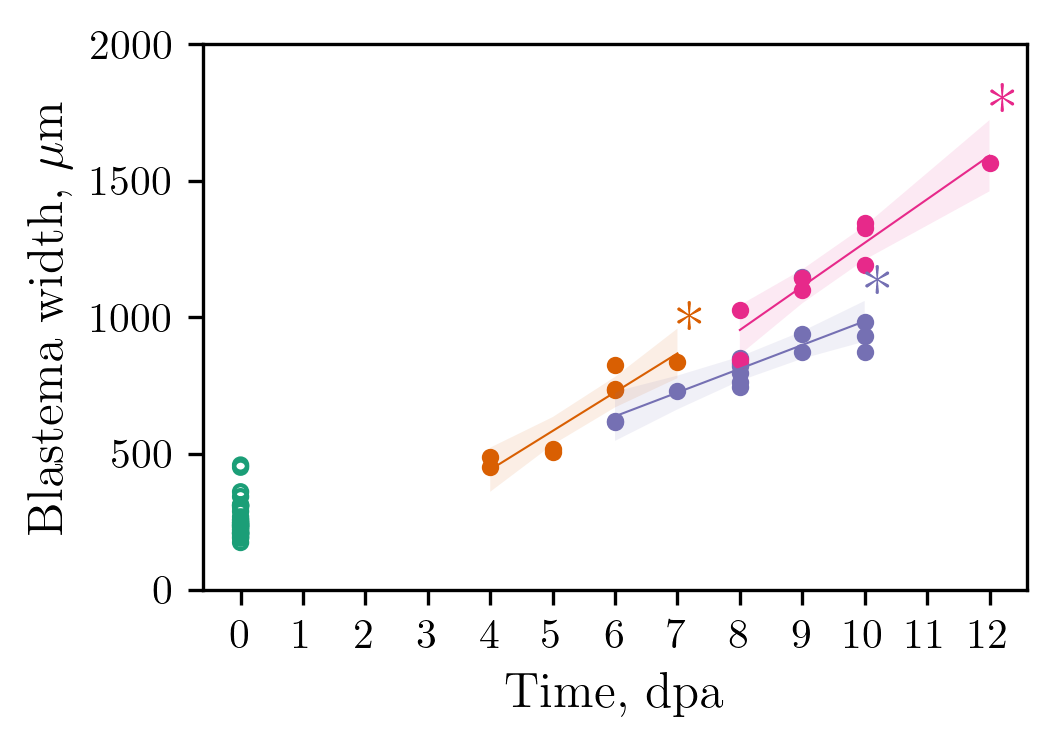

In [33]:
fig = plt.figure(figsize=default_figsize['small'])
ax = plt.subplot()

to_plot = 'system_size_L_along_SF_pc50_um'
    
df_to_plot = df.dropna(subset=[to_plot])

#df_to_plot[to_plot] = df_to_plot[to_plot] / 200 # lambda(fgf8) ~ 200 um

df_regr = df_to_plot[df_to_plot['animal_size'] != 1.5]
x, y = np.array(df_regr['time']), 1e-3 * np.array(df_regr[to_plot]) # mm
k, b, y_est, y_err, k_err, b_err, r2 = statistics.regr( x, y, fit_intercept=True, return_r2=True)

print('regression through all blastemas (LB excluded)')
print(f'y = {k} x + {b}')
print(f'R^2 = {r2}')

#plot.add_regr(ax, x, y, 'gray', '', fit_intercept=True, extend_to_zero=True)

for size in [1.5, 2.5,5, 7]:
    df_regr = df_to_plot[df_to_plot['animal_size'] == size]
    x, y = np.array(df_regr['time']), np.array(df_regr[to_plot]) # um
    x, y = x[~np.isnan(y)], y[~np.isnan(y)]  # Remove NaNs
    x, y = x[~np.isnan(x)], y[~np.isnan(x)]  # Remove NaNs

    if size != 1.5:
        plot.add_regr(ax, x, y, size_to_color[size], '', fit_intercept=True, extend_to_zero=False)
        ax.scatter(
            x, y,
            edgecolor=size_to_color[size], facecolor=size_to_color[size],
            s=10  # Marker size
        )
    else:
        ax.scatter(
            x, y,
            edgecolor=size_to_color[size], facecolor='none',
            s=10  # Marker size
        )

ax.set_xlabel( 'Time, dpa' )
ax.set_ylabel( 'Blastema width, $\mu$m' )

plt.xticks(np.arange(-0, 13, 1)) 
ax.set_ylim(0, 2000)
plt.savefig(f'final/figure_1_c.pdf')
plt.show()